In [31]:
# Import the machine learning libraries.
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras.optimizers import RMSprop

In [32]:
# Load MNIST dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


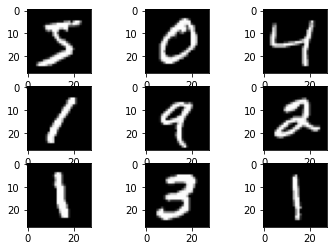

In [33]:
# Create a grid of 3x3 images.
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [34]:
# Compute the number of labels.
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [35]:
# Converts a class vector (integers) to binary class matrix (one-hot encoding).
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [36]:
# Resizing and Normalizztion.
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


In [37]:
# Network parameters.
input_shape = (image_size, image_size)
batch_size = 128
units = 256

In [38]:
# LSTM with 256 units. Input is 28 by 28.
model = Sequential(name='LSTM_MNIST')
model.add(LSTM(units=units, input_shape=input_shape))
model.add(Dense(num_labels, activation='softmax'))
model.summary()

Model: "LSTM_MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Accuracy is good metric for classification tasks.
"""
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
"""
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(1e-3),
              metrics=['acc'])

# Train the network.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=1, epochs=50, batch_size=batch_size)

Epoch 1/50
469/469 [==============================] - 5s 8ms/step - loss: 0.9217 - acc: 0.6787 - val_loss: 0.1735 - val_acc: 0.9489
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1556 - acc: 0.9521 - val_loss: 0.0991 - val_acc: 0.9706
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0866 - acc: 0.9735 - val_loss: 0.0845 - val_acc: 0.9725
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0645 - acc: 0.9800 - val_loss: 0.0605 - val_acc: 0.9813
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0465 - acc: 0.9865 - val_loss: 0.0581 - val_acc: 0.9829
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0392 - acc: 0.9874 - val_loss: 0.0461 - val_acc: 0.9859
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0331 - acc: 0.9898 - val_loss: 0.0508 - val_acc: 0.9843
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.

In [40]:
# List all data in history.
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


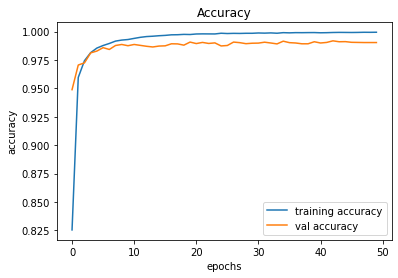

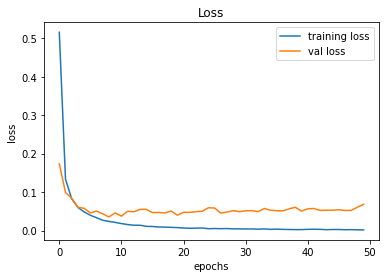

In [41]:
# Plot graphs for accuracy.
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [42]:
# Print accuracy.
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0684 - acc: 0.9904

Test accuracy: 99.0%
